# Estymatory największej wiarygodności

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [7]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
mu= 0
sigma = 1

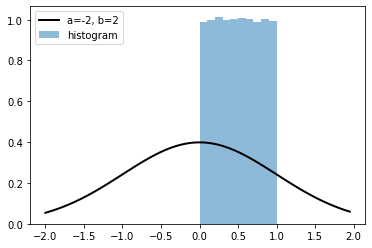

In [8]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-2, b=2')
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

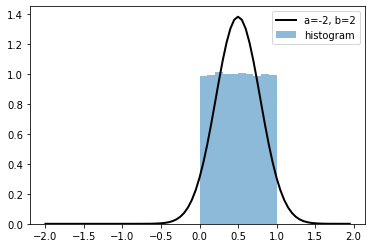

In [9]:
mu_2 = 1/len(data) * sum(data)
sigma_2 = np.sqrt(1/len(data) * sum((data - mu_2)**2))


t_2 = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t_2 ,mu_2, sigma_2), 'k-', lw=2, label='a=-2, b=2')
ax.legend()
plt.show()

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

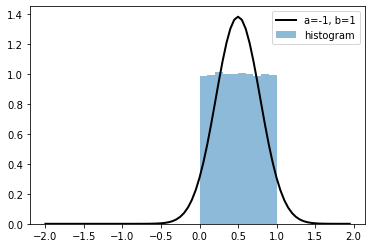

In [10]:
mu_3, sigma_3 = stats.norm.fit(data)


t_3 = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t_3 ,mu_3, sigma_3), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [11]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [12]:
def mle(x, mu, sigma):
    return np.sum(np.log(Gpdf(x, mu, sigma)))

# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [13]:
print(mle(data, 0, 1))
print(mle(data, 0, 2))
print(mle(data, 1, 1))
print(mle(data, 0.5, 0.2))

-108529.97324154995
-165367.60135673248
-108565.05536481051
-34791.58664488122


# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [14]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

         Current function value: 17492.134466
         Iterations: 9
         Function evaluations: 141
         Gradient evaluations: 43
[0.49964917 0.28822403]


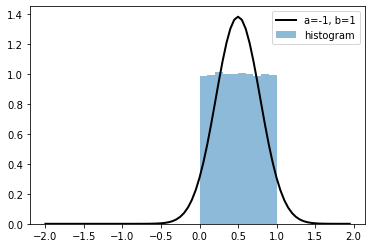

In [15]:
def global_mle(x):
    mu, sigma = x
    return -np.sum(np.log(Gpdf(data, mu, np.abs(sigma) )))


x0 = np.asarray((1, 1)) # Initial guess.
res1 = optimize.fmin_cg(global_mle, x0)
print(res1)

mu, sigma = res1
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()


# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

[0.39894096 0.34756282 0.38943899 ... 0.3556992  0.30955027 0.25296948]
[0.53191602 0.30643741 0.48302129 ... 0.33615542 0.19281165 0.08599656]
[0.10909616 0.50822627 0.2360112  ... 0.46364952 0.67616592 0.79458968]


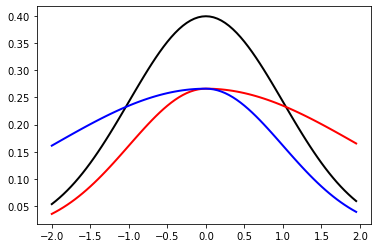

In [16]:
def pdf(x, mu, sigma, tau):
    c = np.sqrt(2 / np.pi) * (1 / sigma) * (1 / (1 + tau))
    scale = np.where(x <= mu, sigma, sigma * tau)
    return c * np.exp(- (x - mu)**2 / (2.0 * scale**2))

print(pdf(data, 0, 1, 1))
print(pdf(data, 0, 1, 0.5))
print(pdf(data, 1, 0.5, 1))


t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.plot(t, pdf(t, 0, 1, 1), 'k-', lw=2)
ax.plot(t, pdf(t, 0, 1, 2), 'r-', lw=2)
ax.plot(t, pdf(t, 0, 2, 0.5), 'b-', lw=2)
plt.show()

# Zadanie 10

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [17]:
def mle_2(x):
    mu, sigma, tau = x
    return -np.sum(np.log(pdf(x, mu, np.abs(sigma), np.abs(tau))))

# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [28]:
x1 = np.asarray((1, 2, 3)) # Initial guess.
res2 = optimize.fmin_cg(mle_2, x1)
print(res2)

         Current function value: 6.098852
         Iterations: 1
         Function evaluations: 206
         Gradient evaluations: 50
[ 1.25563065 -2.47353762  0.6709199 ]


# Zadanie 12
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [24]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]

         Current function value: 1094.276701
         Iterations: 1
         Function evaluations: 30
         Gradient evaluations: 10
[3.79504269 2.10362834]


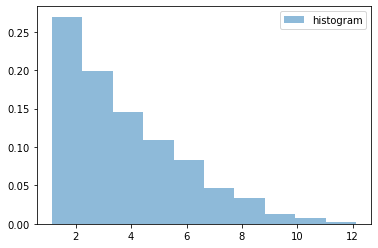

         Current function value: 6.952571
         Iterations: 0
         Function evaluations: 161
         Gradient evaluations: 39
[3.79504269 2.10362834 2.10362836]


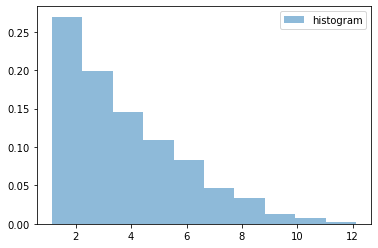

In [31]:
mu=np.mean(data)
sigma=np.std(data)
tau=np.std(data)

x0 = np.asarray((mu, sigma)) # Initial guess.
res1 = optimize.fmin_cg(global_mle, x0)
print(res1)

mu, sigma = res1
t = np.arange(-2, 12, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
#ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()


###############################

x1 = np.asarray((mu, sigma, tau)) # Initial guess.
res2 = optimize.fmin_cg(mle_2, x1)
print(res2)

mu, sigma, tau = res2
t = np.arange(-2, 12, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
#ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

